In [1]:
import os
import torch
from accelerate import Accelerator

from llama2_Model import  llama2_7b_Model_peft
from pap_Dataloader import pap_Dataloader
from evaluation import get_accuracy, get_precision_recall

/home/linux1/miniconda3/envs/llama2pep/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/linux1/miniconda3/envs/llama2pep/lib/python3.9/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/linux1/miniconda3/envs/llama2pep/lib/python3.9/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
! nvidia-smi

Wed Jan 17 18:44:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.29.01              Driver Version: 546.01       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4060 ...    On  | 00000000:01:00.0 Off |                  N/A |
| N/A   44C    P0              11W /  80W |      0MiB /  8188MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Get model and dataloader

In [3]:
def get_filepath(name,classnum_name,file_name):
    '''
    param name: name of the dataset, pep-3k or pap
    param classnum_name: for pap dataset, binary or multiclass
    param file_name: dev, test, train
    return: the str of apath of the file
    '''
    current_dir =os.path.realpath(".")
    parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
    if name=='pap':
        filepath=os.path.abspath(os.path.join(parent_dir,'Data',name,'train-dev-test-split-filtered',classnum_name,file_name+'.csv'))
    else:
        filepath=os.path.abspath(os.path.join(parent_dir,'Data',name,'train-dev-test-split',classnum_name,file_name+'.csv'))
    print(filepath)
    return filepath


In [4]:
# Model from Hugging Face hub
base_model= "meta-llama/Llama-2-7b-hf"

filepath1=get_filepath('pap','binary','train')
filepath2=get_filepath('pap','binary','dev')
filepath3=get_filepath('pap','binary','test')


/home/linux1/BOX/modeling23/Data/pap/train-dev-test-split-filtered/binary/train.csv
/home/linux1/BOX/modeling23/Data/pap/train-dev-test-split-filtered/binary/dev.csv
/home/linux1/BOX/modeling23/Data/pap/train-dev-test-split-filtered/binary/test.csv


In [5]:
model = llama2_7b_Model_peft(base_model)
tokenizer = model.tokenizer

Loading checkpoint shards: 100%|██████████| 2/2 [00:11<00:00,  5.73s/it]
Some weights of LlamaForSequenceClassification were not initialized from the model checkpoint at meta-llama/Llama-2-7b-hf and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Original number of parameters: 6607351808
LlamaForSequenceClassification(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear8bitLt(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear8bitLt(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear8bitLt(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear8bitLt(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear8bitLt(in_features=4096, out_features=11008, bias=False)
          (up_proj): Linear8bitLt(in_features=4096, out_features=11008, bias=False)
          (down_proj): Linear8bitLt(in_features=11008, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (p

Loading checkpoint shards: 100%|██████████| 2/2 [00:26<00:00, 13.23s/it]
Some weights of LlamaForSequenceClassification were not initialized from the model checkpoint at meta-llama/Llama-2-7b-hf and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Original number of parameters: 6607351808
LlamaForSequenceClassification(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear8bitLt(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear8bitLt(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear8bitLt(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear8bitLt(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear8bitLt(in_features=4096, out_features=11008, bias=False)
          (up_proj): Linear8bitLt(in_features=4096, out_features=11008, bias=False)
          (down_proj): Linear8bitLt(in_features=11008, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (p

In [6]:
train_dataloader=pap_Dataloader(filepath1,tokenizer,3)
eval_dataloader=pap_Dataloader(filepath2,tokenizer,'defalut')
test_dataloader=pap_Dataloader(filepath3,tokenizer,'defalut')

Dataset({
    features: ['text', 'labels'],
    num_rows: 1386
})
Dataset({
    features: ['text', 'labels'],
    num_rows: 1386
})


Map: 100%|██████████| 1386/1386 [00:00<00:00, 20276.76 examples/s]


Dataset({
    features: ['text', 'labels'],
    num_rows: 173
})
Dataset({
    features: ['text', 'labels'],
    num_rows: 173
})


Map: 100%|██████████| 173/173 [00:00<00:00, 15718.19 examples/s]


Dataset({
    features: ['text', 'labels'],
    num_rows: 174
})
Dataset({
    features: ['text', 'labels'],
    num_rows: 174
})


Map: 100%|██████████| 174/174 [00:00<00:00, 16493.60 examples/s]


### Check original model with test data

In [7]:
model.do_reference(test_dataloader.dataloader)

/home/linux1/miniconda3/envs/llama2pep/lib/python3.9/site-packages/bitsandbytes/autograd/_functions.py:322: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


Accuracy: 0.414
---positive is plausible
Precision: 0.469
Recall: 0.558
F-score: 0.510
---positive is implausible
Precision: 0.311
Recall: 0.241
F-score: 0.271


### Train

In [8]:
from torch.optim import AdamW
from tqdm.auto import tqdm
import torch.nn as nn
from transformers import get_scheduler

optimizer = AdamW(model.model.parameters(), lr=1e-4 )#5e-5)
loss_fn = nn.CrossEntropyLoss()

num_epochs = 3
num_training_steps = num_epochs * len(train_dataloader.dataset)

#learning rate adjustment:
lr_scheduler = get_scheduler( 
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda


In [9]:
accelerator = Accelerator()
train_dataloader, eval_dataloader, model, optimizer = accelerator.prepare(
    train_dataloader.dataloader, eval_dataloader.dataloader, model.model, optimizer
)
loss_list=[]
accuracy_list=[]
loss_sum=0
accuracy_sum=0


In [10]:
print(num_epochs)
print(len(train_dataloader))
num_training_steps = num_epochs * len(train_dataloader)
print(num_training_steps)
print(num_training_steps/20)
# print(int(num_training_steps/30))
for thelabels,text in train_dataloader:
    print('thelabels:',thelabels)
    print('text:',text)
    break

3
462
1386
69.3
thelabels: tensor([1, 0, 0], device='cuda:0')
text: {'input_ids': tensor([[    1, 10225, 11981,  3234,  2068,     2,     2,     2,     2,     2,
             2,     2,     2],
        [    1,  9027,  2756,   506,  1372, 12875,     2,     2,     2,     2,
             2,     2,     2],
        [    1,   767,   766,   771,  1960,  6012,     2,     2,     2,     2,
             2,     2,     2]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0')}


In [11]:
# train
progress_bar = tqdm(range(int(num_training_steps/20)))

flag=0
for epoch in range(num_epochs):
    for thelabels,text in train_dataloader:
        model.model.train()
        outputs = model.model(**text)
        logits = outputs.logits
        loss = loss_fn(logits.squeeze(), thelabels)
        accelerator.backward(loss)
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        flag+=1

        loss_sum += int(loss.item())
        a=get_accuracy(logits, thelabels)
        accuracy_sum+=a

        if flag%20==0:
            print(flag,loss_sum/flag,accuracy_sum/flag)
            loss_list.append(loss_sum/flag)
            accuracy_list.append(accuracy_sum/flag)
            progress_bar.update(1)

  0%|          | 0/69 [00:00<?, ?it/s]/home/linux1/miniconda3/envs/llama2pep/lib/python3.9/site-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
  1%|▏         | 1/69 [00:38<43:15, 38.17s/it]

20 0.6 0.4333333333333334


  3%|▎         | 2/69 [01:16<42:35, 38.14s/it]

40 0.6 0.45833333333333337


  4%|▍         | 3/69 [01:54<41:52, 38.07s/it]

60 0.5666666666666667 0.4555555555555557


  6%|▌         | 4/69 [02:32<41:26, 38.26s/it]

80 0.4625 0.5125000000000001


  7%|▋         | 5/69 [03:09<40:13, 37.72s/it]

100 0.43 0.5466666666666667


  9%|▊         | 6/69 [03:47<39:40, 37.79s/it]

120 0.375 0.5805555555555557


 10%|█         | 7/69 [04:24<38:37, 37.39s/it]

140 0.3357142857142857 0.6047619047619052


 12%|█▏        | 8/69 [05:01<38:01, 37.41s/it]

160 0.30625 0.6270833333333339


 13%|█▎        | 9/69 [05:38<37:18, 37.30s/it]

180 0.2777777777777778 0.6462962962962967


 14%|█▍        | 10/69 [06:15<36:39, 37.28s/it]

200 0.26 0.6633333333333337


 16%|█▌        | 11/69 [06:52<35:52, 37.11s/it]

220 0.23636363636363636 0.6833333333333333


 17%|█▋        | 12/69 [07:29<35:10, 37.03s/it]

240 0.22916666666666666 0.6972222222222221


 19%|█▉        | 13/69 [08:07<34:45, 37.25s/it]

260 0.21153846153846154 0.7128205128205124


 20%|██        | 14/69 [08:44<34:13, 37.34s/it]

280 0.20357142857142857 0.7249999999999995


 22%|██▏       | 15/69 [09:22<33:44, 37.48s/it]

300 0.19333333333333333 0.7299999999999994


 23%|██▎       | 16/69 [10:00<33:12, 37.60s/it]

320 0.184375 0.7343749999999991


 25%|██▍       | 17/69 [10:36<32:04, 37.02s/it]

340 0.17941176470588235 0.7401960784313715


 26%|██▌       | 18/69 [11:12<31:25, 36.97s/it]

360 0.175 0.7453703703703697


 28%|██▊       | 19/69 [11:49<30:40, 36.82s/it]

380 0.16842105263157894 0.7499999999999999


 29%|██▉       | 20/69 [12:26<30:15, 37.06s/it]

400 0.165 0.7558333333333332


 30%|███       | 21/69 [13:04<29:44, 37.17s/it]

420 0.15714285714285714 0.7595238095238099


 32%|███▏      | 22/69 [13:41<29:01, 37.05s/it]

440 0.16590909090909092 0.7621212121212128


 33%|███▎      | 23/69 [14:17<28:15, 36.85s/it]

460 0.1608695652173913 0.7681159420289864


 35%|███▍      | 24/69 [14:54<27:42, 36.94s/it]

480 0.15625 0.7743055555555566


 36%|███▌      | 25/69 [15:32<27:12, 37.11s/it]

500 0.15 0.7813333333333344


 38%|███▊      | 26/69 [16:10<26:47, 37.39s/it]

520 0.15 0.7833333333333345


 39%|███▉      | 27/69 [16:47<26:13, 37.46s/it]

540 0.14444444444444443 0.7882716049382729


 41%|████      | 28/69 [17:24<25:20, 37.09s/it]

560 0.1392857142857143 0.7934523809523824


 42%|████▏     | 29/69 [18:00<24:39, 36.98s/it]

580 0.13620689655172413 0.794827586206898


 43%|████▎     | 30/69 [18:37<24:03, 37.02s/it]

600 0.13333333333333333 0.7977777777777793


 45%|████▍     | 31/69 [19:14<23:17, 36.79s/it]

620 0.13225806451612904 0.80215053763441


 46%|████▋     | 32/69 [19:51<22:44, 36.88s/it]

640 0.128125 0.8067708333333348


 48%|████▊     | 33/69 [20:28<22:09, 36.92s/it]

660 0.12424242424242424 0.8075757575757584


 49%|████▉     | 34/69 [21:04<21:28, 36.83s/it]

680 0.12205882352941176 0.8102941176470595


 51%|█████     | 35/69 [21:41<20:53, 36.88s/it]

700 0.11857142857142858 0.8152380952380959


 52%|█████▏    | 36/69 [22:18<20:10, 36.67s/it]

720 0.11805555555555555 0.8185185185185191


 54%|█████▎    | 37/69 [22:54<19:32, 36.63s/it]

740 0.11621621621621622 0.8216216216216219


 55%|█████▌    | 38/69 [23:31<18:56, 36.65s/it]

760 0.11447368421052631 0.8258771929824564


 57%|█████▋    | 39/69 [24:08<18:19, 36.65s/it]

780 0.11153846153846154 0.8290598290598291


 58%|█████▊    | 40/69 [24:44<17:39, 36.52s/it]

800 0.11 0.8316666666666666


 59%|█████▉    | 41/69 [25:20<17:03, 36.55s/it]

820 0.10975609756097561 0.8337398373983737


 61%|██████    | 42/69 [25:57<16:31, 36.73s/it]

840 0.10714285714285714 0.837301587301587


 62%|██████▏   | 43/69 [26:33<15:48, 36.50s/it]

860 0.10813953488372093 0.83875968992248


 64%|██████▍   | 44/69 [27:09<15:07, 36.31s/it]

880 0.10681818181818181 0.8405303030303023


 65%|██████▌   | 45/69 [27:46<14:36, 36.53s/it]

900 0.10444444444444445 0.8429629629629621


 67%|██████▋   | 46/69 [28:22<13:56, 36.38s/it]

920 0.10326086956521739 0.8452898550724629


 68%|██████▊   | 47/69 [28:58<13:15, 36.18s/it]

940 0.10106382978723404 0.847872340425531


 70%|██████▉   | 48/69 [29:35<12:45, 36.43s/it]

960 0.09895833333333333 0.849999999999999


 71%|███████   | 49/69 [30:11<12:08, 36.41s/it]

980 0.09693877551020408 0.8523809523809512


 72%|███████▏  | 50/69 [30:48<11:29, 36.31s/it]

1000 0.096 0.8549999999999989


 74%|███████▍  | 51/69 [31:24<10:52, 36.27s/it]

1020 0.09411764705882353 0.8575163398692799


 75%|███████▌  | 52/69 [32:00<10:16, 36.29s/it]

1040 0.09230769230769231 0.8602564102564091


 77%|███████▋  | 53/69 [32:36<09:37, 36.12s/it]

1060 0.09056603773584905 0.8625786163522001


 78%|███████▊  | 54/69 [33:12<09:02, 36.14s/it]

1080 0.08888888888888889 0.8648148148148137


 80%|███████▉  | 55/69 [33:49<08:28, 36.33s/it]

1100 0.08727272727272728 0.8666666666666655


 81%|████████  | 56/69 [34:24<07:49, 36.15s/it]

1120 0.08571428571428572 0.8678571428571416


 83%|████████▎ | 57/69 [35:01<07:16, 36.40s/it]

1140 0.08508771929824561 0.8687134502923963


 84%|████████▍ | 58/69 [35:38<06:40, 36.44s/it]

1160 0.08362068965517241 0.8709770114942516


 86%|████████▌ | 59/69 [36:13<06:01, 36.11s/it]

1180 0.08220338983050847 0.8720338983050832


 87%|████████▋ | 60/69 [36:50<05:26, 36.28s/it]

1200 0.0825 0.8736111111111097


 88%|████████▊ | 61/69 [37:26<04:50, 36.33s/it]

1220 0.08114754098360656 0.8754098360655724


 90%|████████▉ | 62/69 [38:03<04:15, 36.45s/it]

1240 0.08064516129032258 0.8768817204301064


 91%|█████████▏| 63/69 [38:40<03:39, 36.65s/it]

1260 0.07936507936507936 0.8783068783068773


 93%|█████████▎| 64/69 [39:18<03:04, 36.85s/it]

1280 0.078125 0.8796874999999991


 94%|█████████▍| 65/69 [39:55<02:28, 37.02s/it]

1300 0.07692307692307693 0.8810256410256403


 96%|█████████▌| 66/69 [40:31<01:50, 36.85s/it]

1320 0.07575757575757576 0.8825757575757569


 97%|█████████▋| 67/69 [41:09<01:13, 36.99s/it]

1340 0.07462686567164178 0.8840796019900491


 99%|█████████▊| 68/69 [41:47<00:37, 37.21s/it]

1360 0.07426470588235294 0.8845588235294113


100%|██████████| 69/69 [42:25<00:00, 37.49s/it]

1380 0.07318840579710145 0.8855072463768112


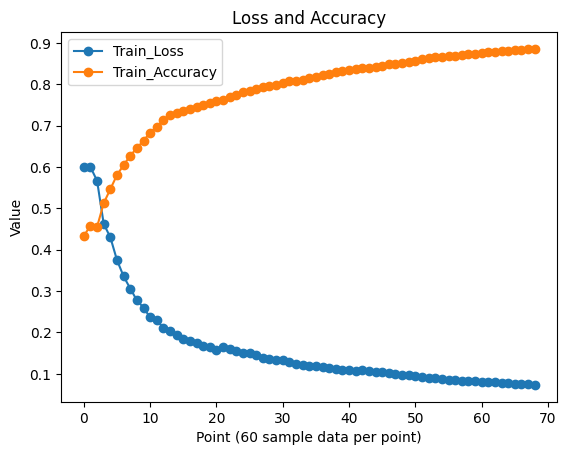

In [12]:
# print(loss_list)
# print(accuracy_list)

import matplotlib.pyplot as plt

# Plotting the data
plt.plot(loss_list, label='Train_Loss', marker='o')
plt.plot(accuracy_list, label='Train_Accuracy', marker='o')

# Adding labels and title
plt.xlabel('Point (60 sample data per point)')
plt.ylabel('Value')
plt.title('Loss and Accuracy')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


In [15]:
def do_inference(dataloader):
    model.eval()
    with torch.no_grad():
        for labels,text in dataloader:
            logits = model(**text).logits
            the_labels=labels
            get_accuracy(logits, the_labels,flag2='print')
            get_precision_recall(logits, the_labels,flag2='print')
            get_precision_recall(logits, the_labels,flag='false',flag2='print')

In [16]:
do_inference(test_dataloader.dataloader)

/home/linux1/miniconda3/envs/llama2pep/lib/python3.9/site-packages/bitsandbytes/autograd/_functions.py:322: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


Accuracy: 0.862
---positive is plausible
Precision: 0.938
Recall: 0.800
F-score: 0.864
---positive is implausible
Precision: 0.796
Recall: 0.937
F-score: 0.860


In [17]:
save_dir= "./after_finetune_llama2_7B_un_merge"
model.model.save_pretrained(save_dir,safe_safetensors=True)
save_dir_tokenizer= save_dir+"/tokenizer"
tokenizer.save_pretrained(save_dir_tokenizer)

Removed shared tensor {'model.layers.17.mlp.up_proj.weight_format', 'model.layers.30.self_attn.v_proj.base_layer.weight_format', 'model.layers.21.mlp.gate_proj.weight_format', 'model.layers.11.self_attn.v_proj.base_layer.weight_format', 'model.layers.27.self_attn.q_proj.base_layer.weight_format', 'model.layers.12.self_attn.q_proj.base_layer.weight_format', 'model.layers.7.self_attn.o_proj.weight_format', 'model.layers.3.mlp.down_proj.weight_format', 'model.layers.13.mlp.gate_proj.weight_format', 'model.layers.14.self_attn.k_proj.weight_format', 'model.layers.31.self_attn.k_proj.weight_format', 'model.layers.12.self_attn.o_proj.weight_format', 'model.layers.5.mlp.down_proj.weight_format', 'model.layers.31.mlp.down_proj.weight_format', 'model.layers.10.self_attn.q_proj.base_layer.weight_format', 'model.layers.12.self_attn.k_proj.weight_format', 'model.layers.17.self_attn.k_proj.weight_format', 'model.layers.8.self_attn.o_proj.weight_format', 'model.layers.7.self_attn.v_proj.base_layer.we

('./after_finetune_llama2_7B_un_merge/tokenizer/tokenizer_config.json',
 './after_finetune_llama2_7B_un_merge/tokenizer/special_tokens_map.json',
 './after_finetune_llama2_7B_un_merge/tokenizer/tokenizer.model',
 './after_finetune_llama2_7B_un_merge/tokenizer/added_tokens.json',
 './after_finetune_llama2_7B_un_merge/tokenizer/tokenizer.json')

In [ ]:
#model.merge_and_unload()

##  Problem: Loading the model after saving will encounter problems:
### 1. save model before using model.merge_and_unload() : 
#### Reload success. But after saving and loading the model, the performance is not the same (almost as bad as the original model).
### 2. save model after using model.merge_and_unload(): 
#### Reload fail. Get error: SafetensorError: Error while deserializing header: InvalidHeaderDeserialization

This problem has not been solved yet.